In [76]:
import statistics
from math import hypot

import pandas as pd
from geopy import Point
from geopy.distance import distance
from matplotlib import pyplot as plt

plt.rcParams['figure.dpi'] = 600

In [77]:
df = pd.read_csv("precomputed_network_params.csv")
df

,distance,throughput,delay
0,0.000000,134.380160,121.123763
1,1.000000,134.996960,131.149062
2,2.828427,148.470613,122.787378
3,5.196152,180.599040,38.029783
4,8.000000,203.256160,7.940914
...,...,...,...
995,31385.902488,0.000000,0.000000
996,31433.229805,0.000000,0.000000
997,31480.580887,0.000000,0.000000
998,31527.955722,0.000000,0.000000


<Axes: xlabel='Distance [m]'>

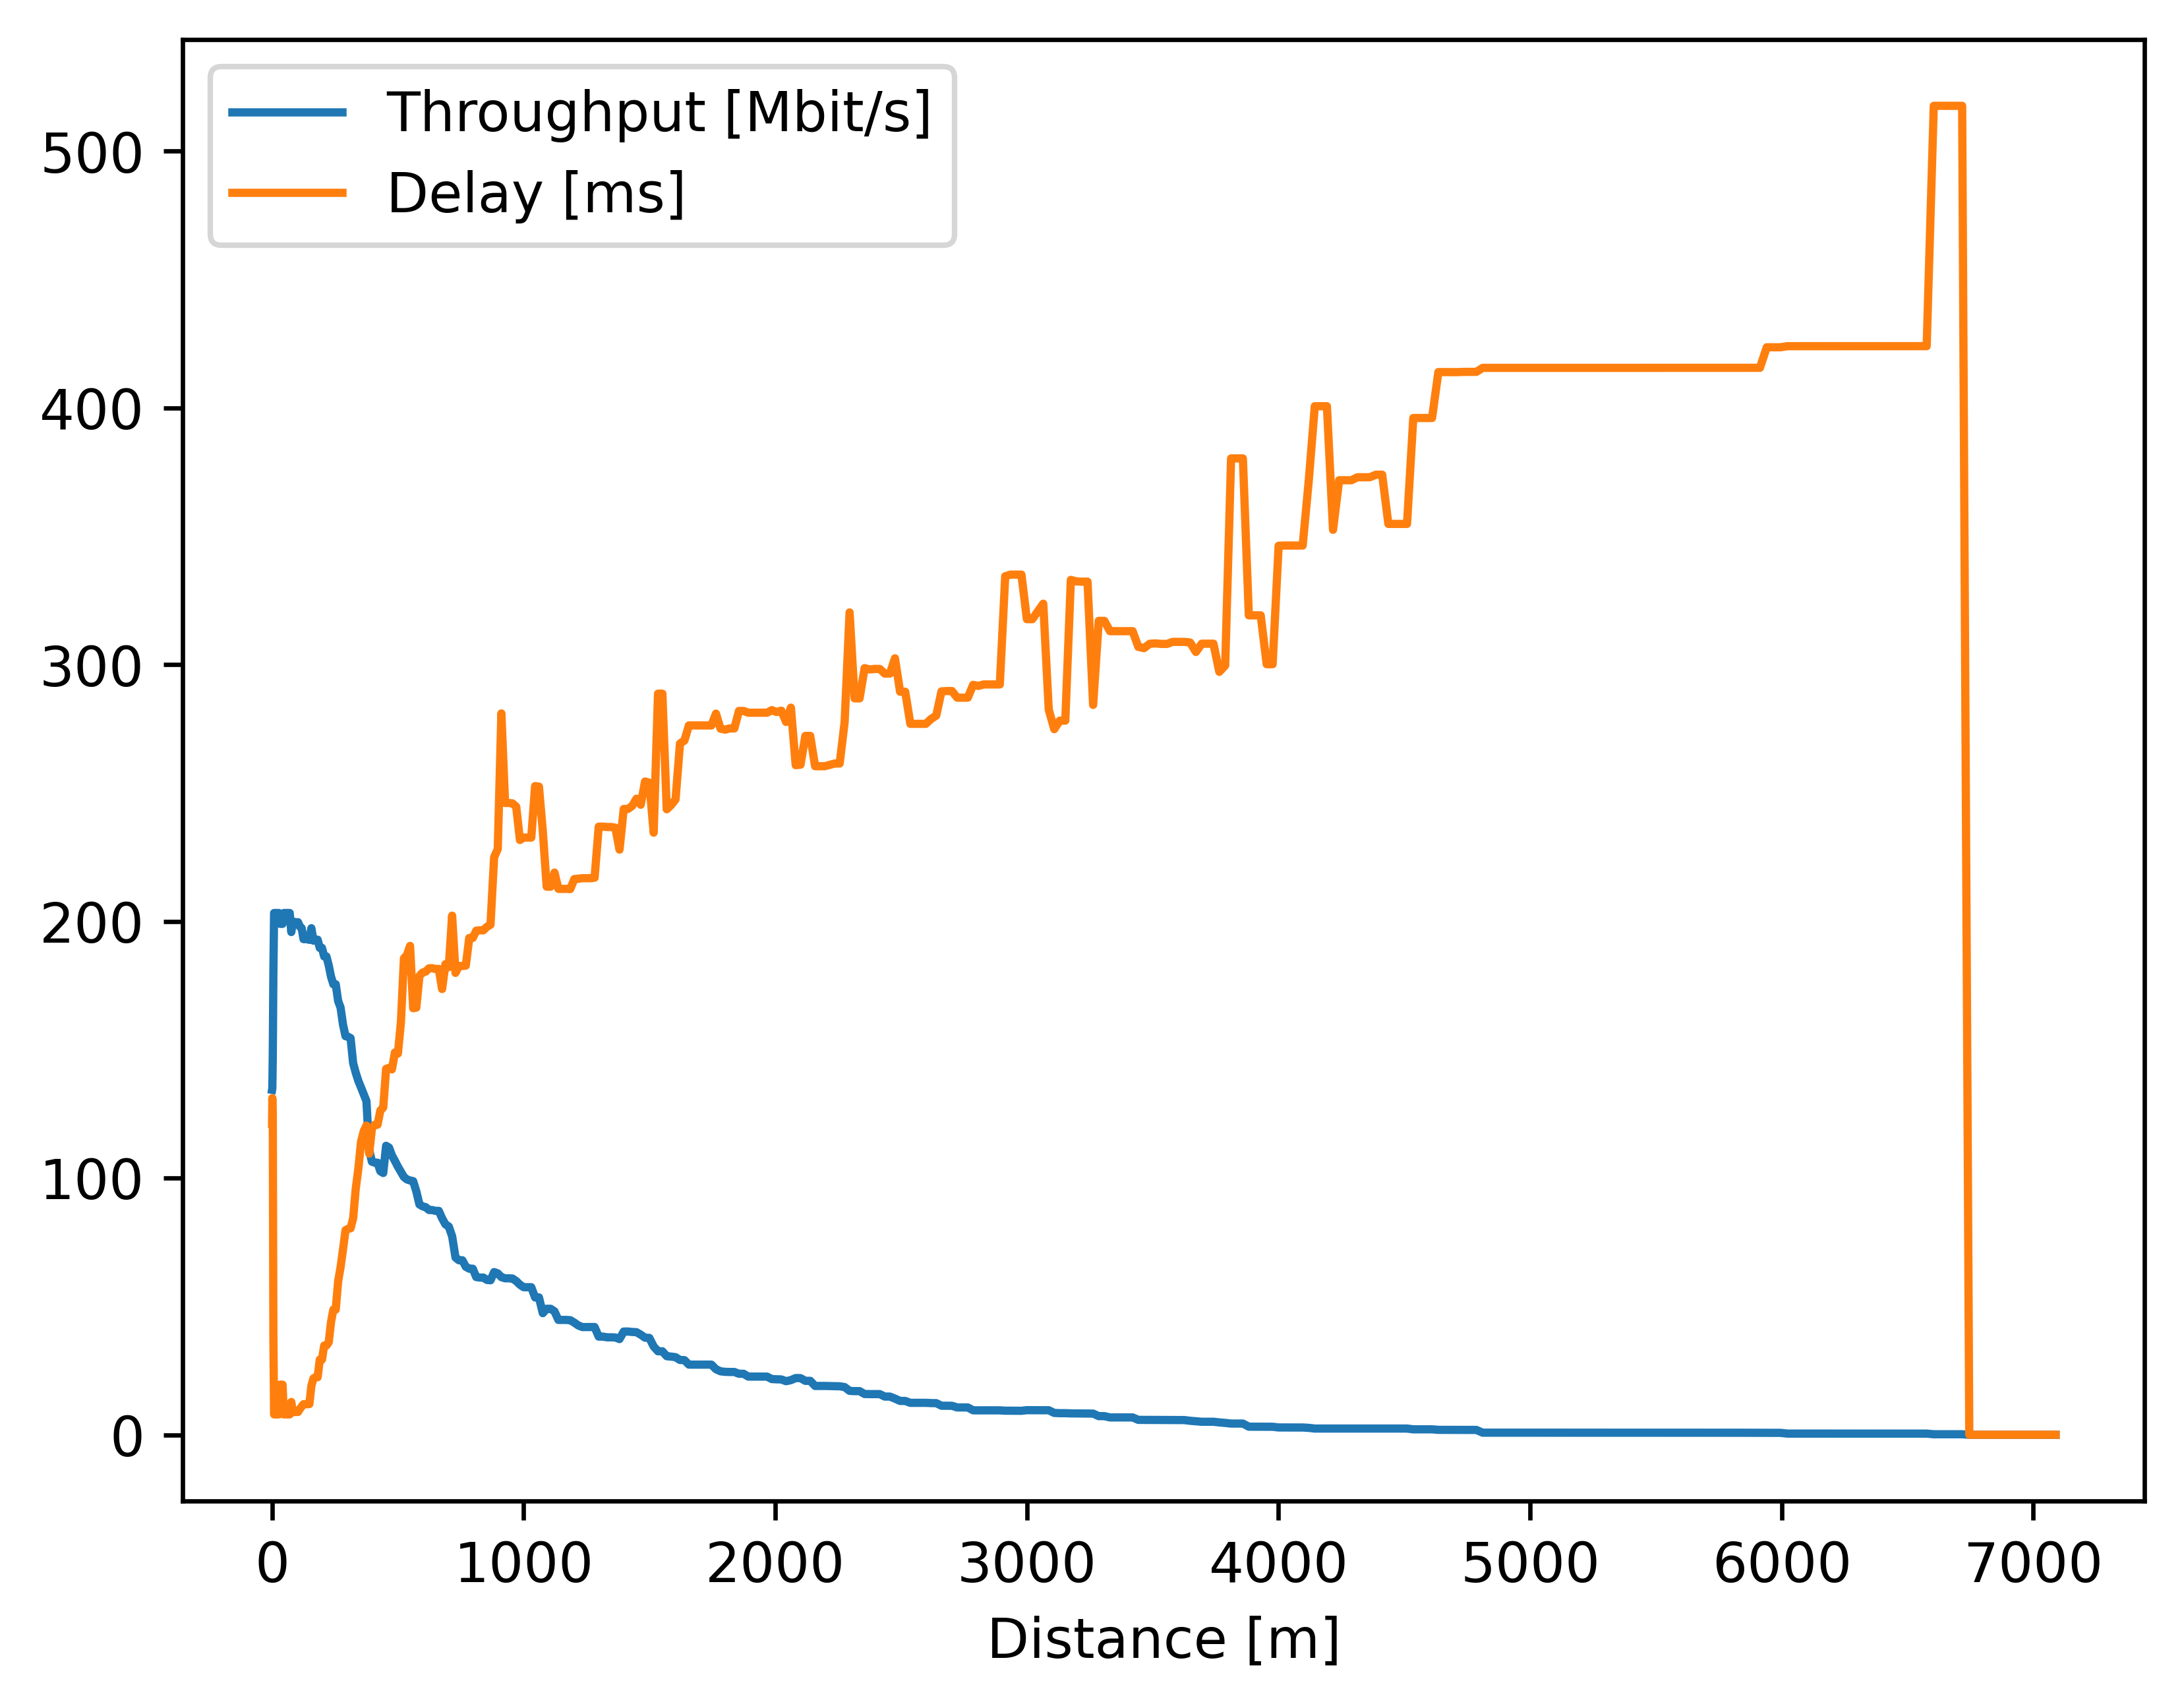

In [78]:
df.iloc[:370].plot(x="distance", y=["throughput", "delay"], label=["Throughput [Mbit/s]", "Delay [ms]"], xlabel="Distance [m]")

In [79]:
df = pd.read_csv("scalability_results.csv")
df["Total Requests"] = df["Successful"] + df["TimeoutError"]+ df["ConnectionRefusedError"] + df["ClientConnectionError"]
df

,uav_count,Successful,TimeoutError,ConnectionRefusedError,ClientConnectionError,Total Requests
0,20,17860,0,0,0,17860
1,40,35520,0,0,0,35520
2,60,52821,39,0,0,52860
3,80,69841,79,0,0,69920
4,100,86604,96,0,0,86700
5,120,102820,140,0,0,102960
6,140,117963,757,0,0,118720
7,160,133109,751,0,0,133860
8,180,140591,8269,0,0,148860
9,200,152686,9714,0,0,162400


<Axes: xlabel='Number of UAVs', ylabel='Number of Requests'>

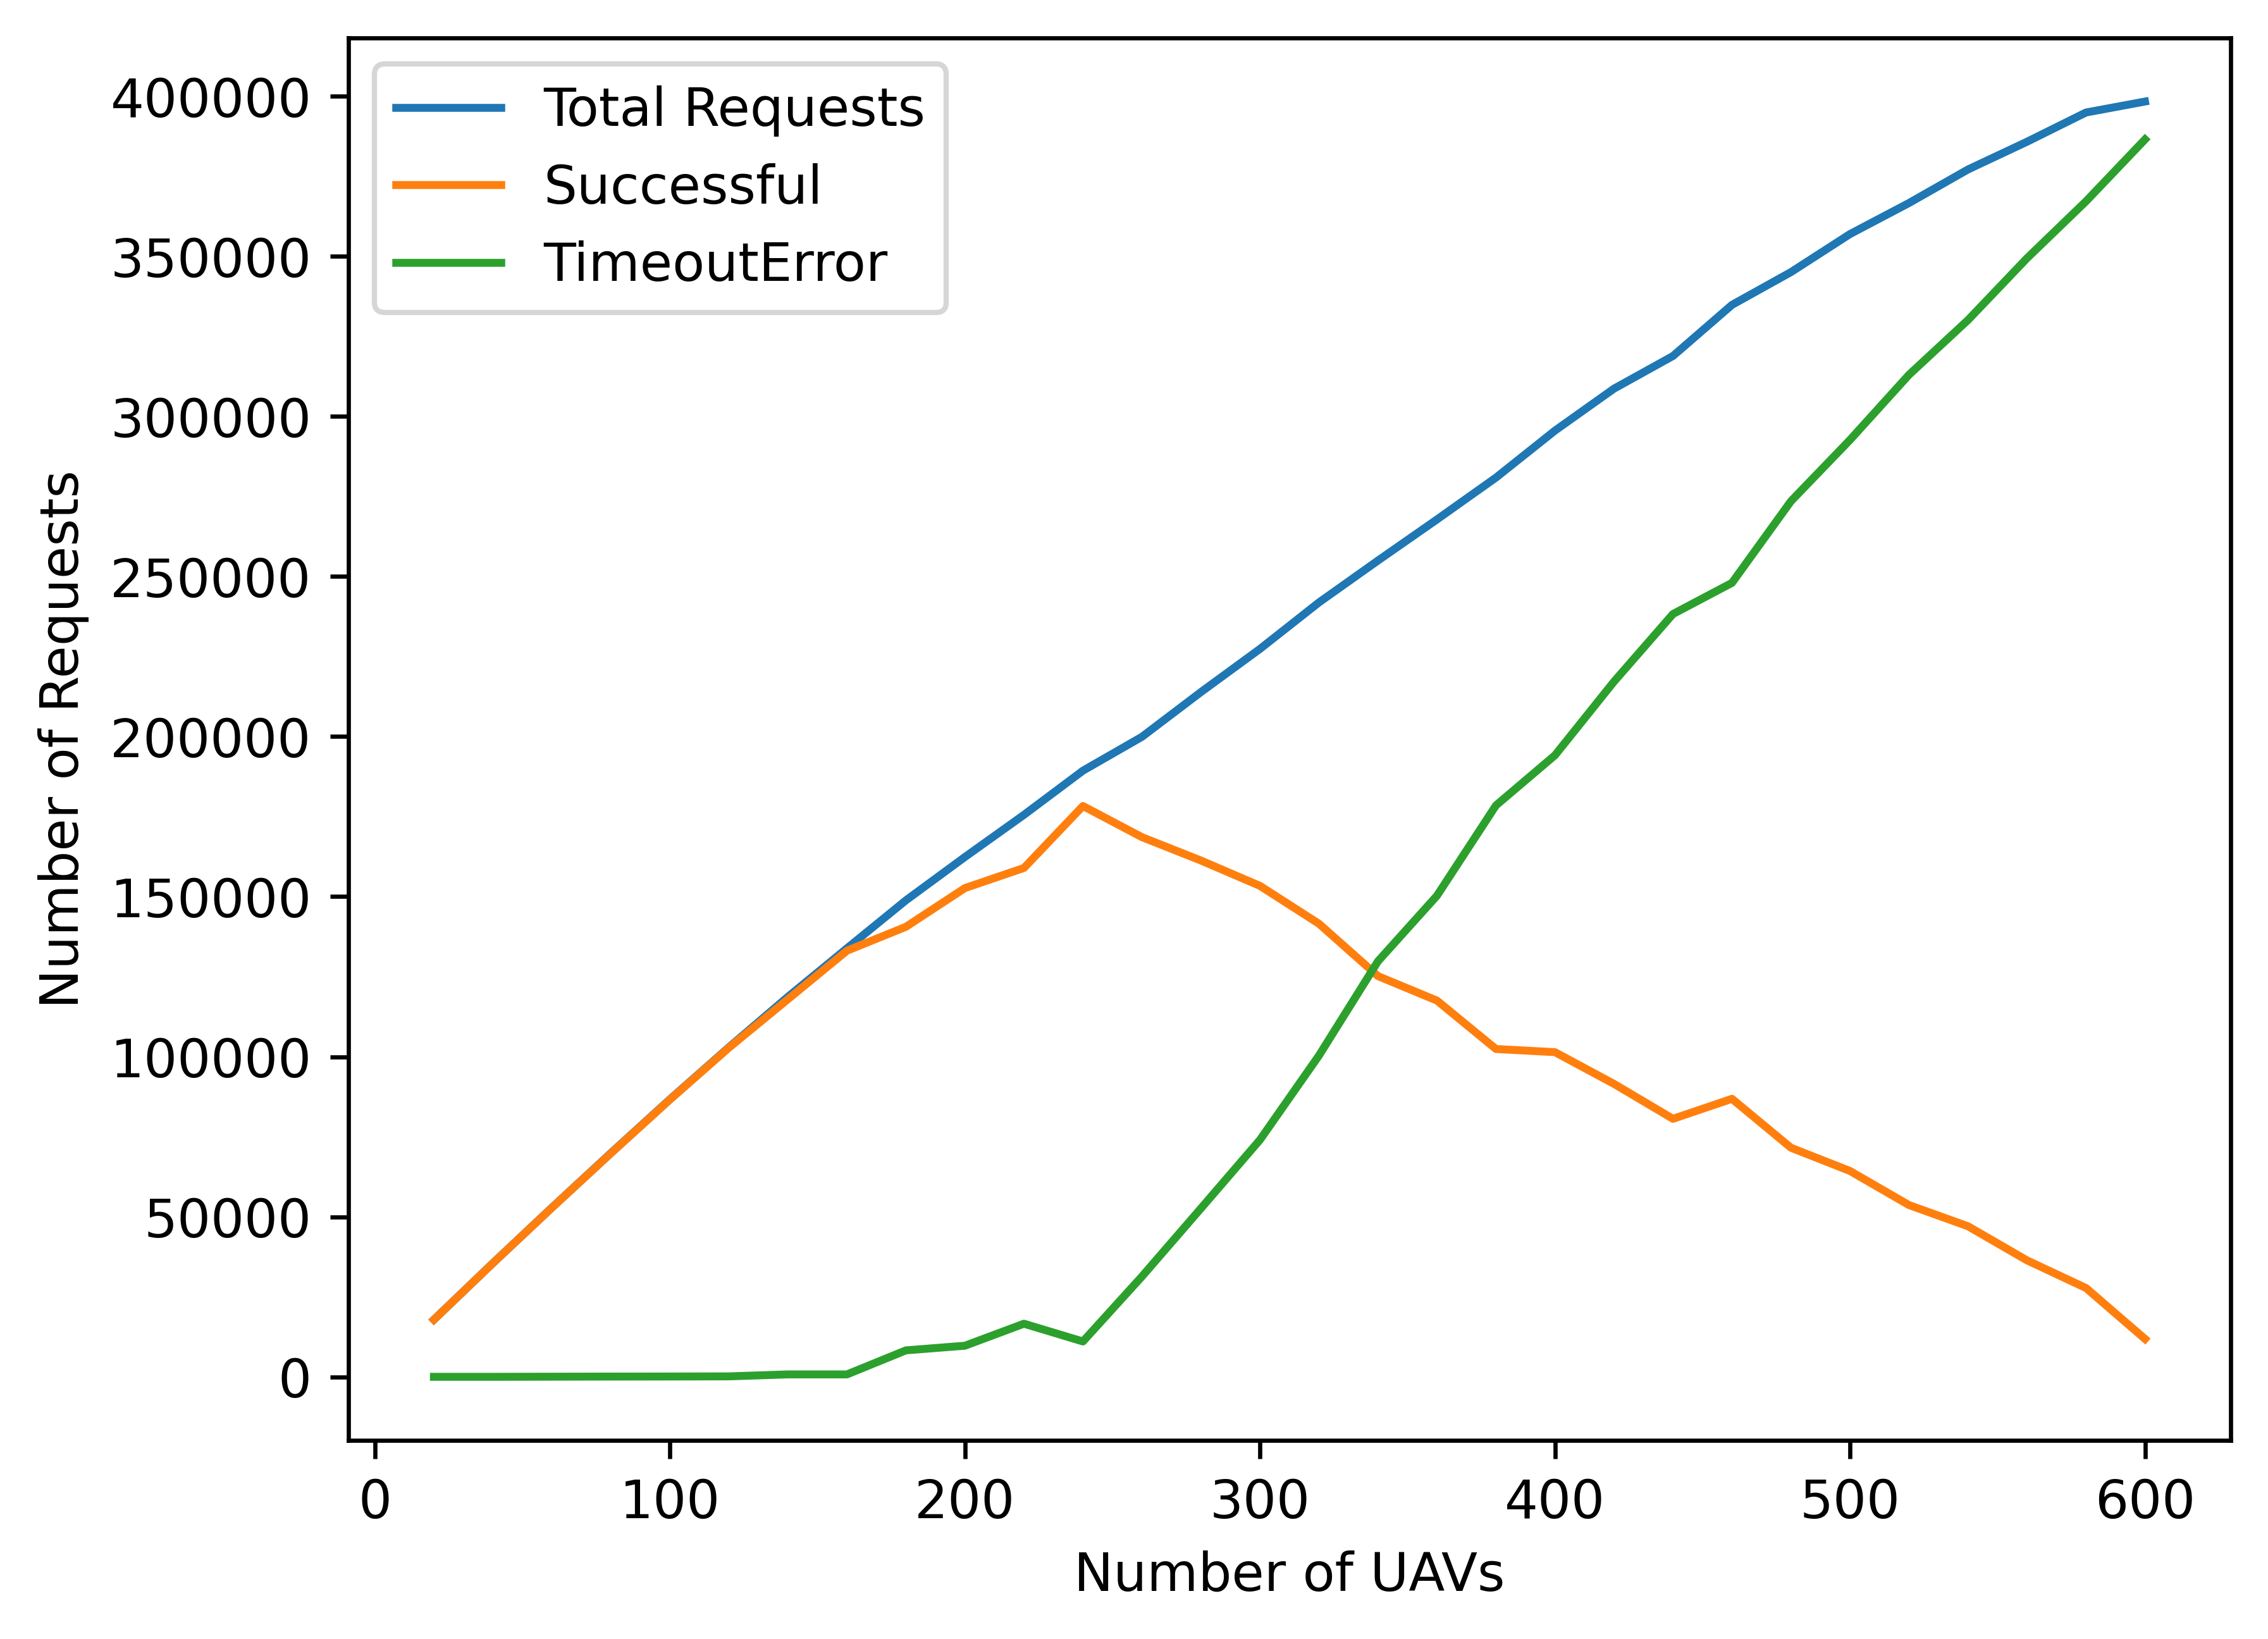

In [80]:
df.plot(x="uav_count", y=["Total Requests", "Successful", "TimeoutError"], xlabel="Number of UAVs", ylabel="Number of Requests")

In [81]:
df["Successful"] /= df["uav_count"]
df["TimeoutError"] /= df["uav_count"]
df["ConnectionRefusedError"] /= df["uav_count"]
df["ClientConnectionError"] /= df["uav_count"]
df["Total Requests"] = df["Successful"] + df["TimeoutError"] + df["ConnectionRefusedError"] + df[
    "ClientConnectionError"]
df

,uav_count,Successful,TimeoutError,ConnectionRefusedError,ClientConnectionError,Total Requests
0,20,893.000000,0.000000,0.0,0.0,893.000000
1,40,888.000000,0.000000,0.0,0.0,888.000000
2,60,880.350000,0.650000,0.0,0.0,881.000000
3,80,873.012500,0.987500,0.0,0.0,874.000000
4,100,866.040000,0.960000,0.0,0.0,867.000000
5,120,856.833333,1.166667,0.0,0.0,858.000000
6,140,842.592857,5.407143,0.0,0.0,848.000000
7,160,831.931250,4.693750,0.0,0.0,836.625000
8,180,781.061111,45.938889,0.0,0.0,827.000000
9,200,763.430000,48.570000,0.0,0.0,812.000000


<Axes: xlabel='Number of UAVs', ylabel='Requests per UAV'>

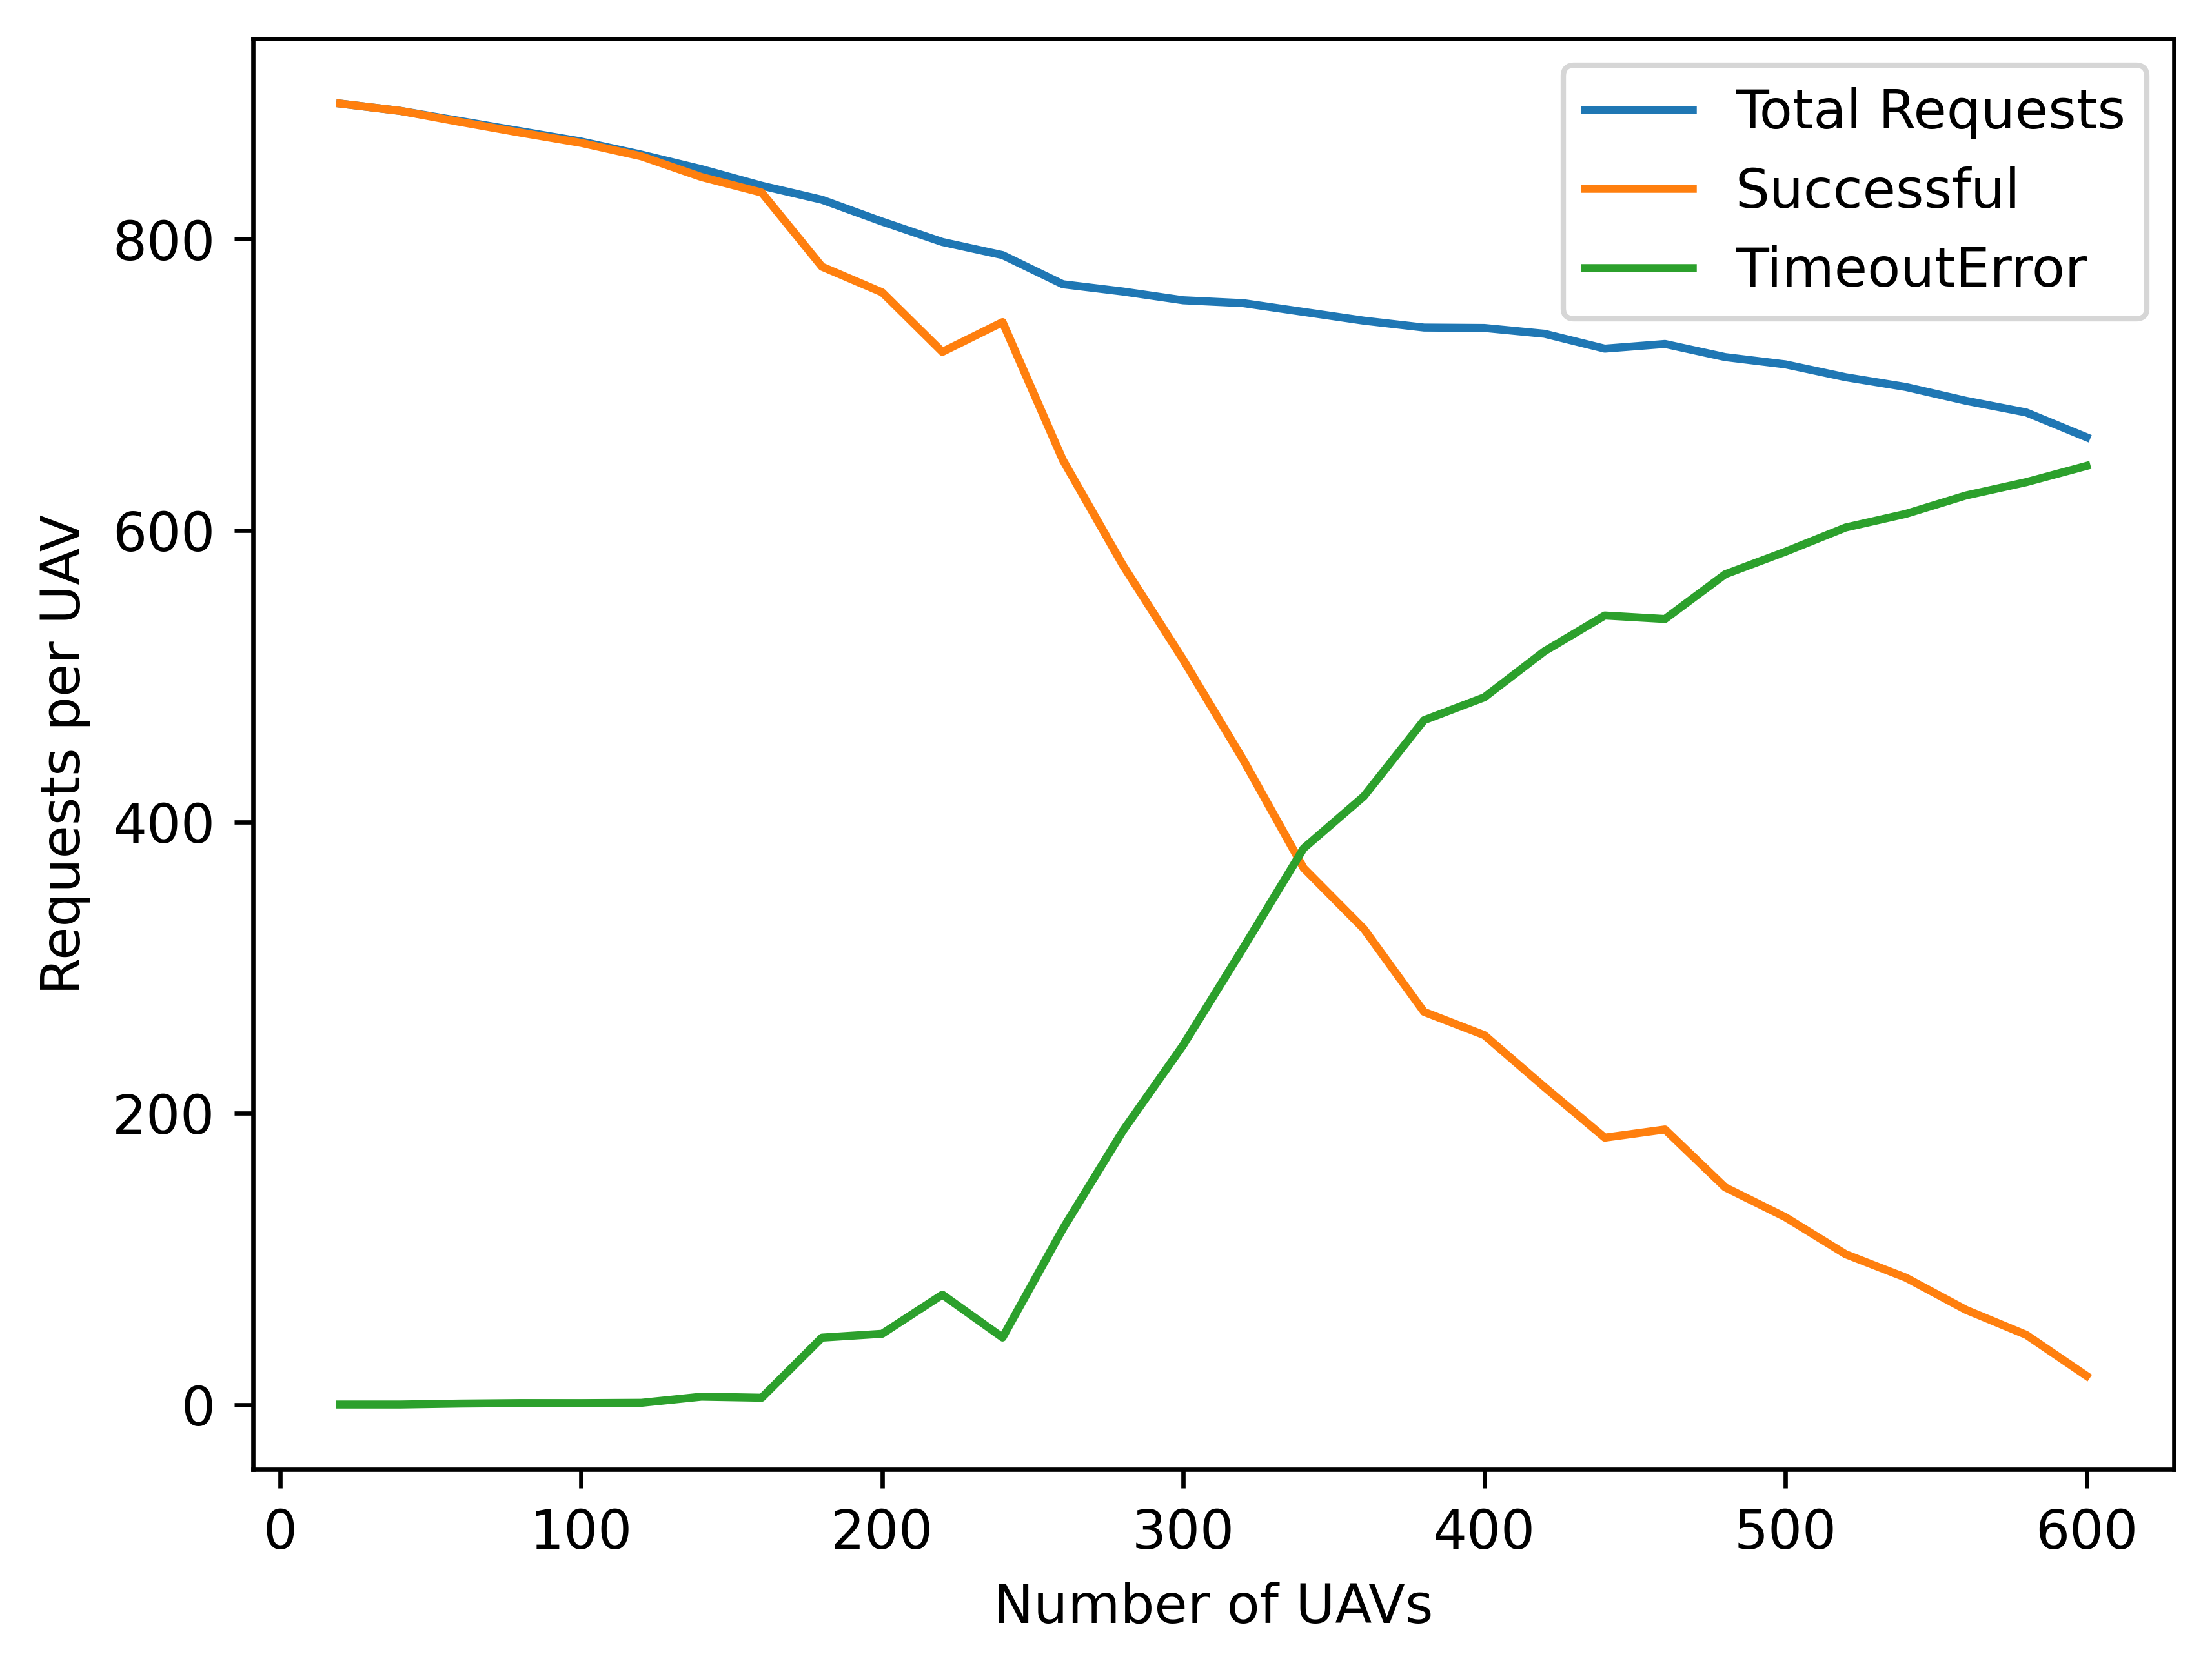

In [82]:
df.plot(x="uav_count", y=["Total Requests", "Successful", "TimeoutError"], xlabel="Number of UAVs", ylabel="Requests per UAV")

In [83]:
starting_points = [Point(52.20926387119226, 13.150638419142386, 280.9868274900829), Point(52.208051405942456, 13.15857518241892, 300.937371163478), Point(52.198012191049756, 13.158607849834379, 396.5570952075306), Point(52.20857977888169, 13.158389690474372, 336.79678638308826), Point(52.20181828847081, 13.15867314577977, 393.32127355415173), Point(52.20191562969281, 13.151386910791725, 202.80834003280378), Point(52.20676952788984, 13.140435781101301, 298.71557329306495), Point(52.209727489671614, 13.14423426654506, 313.50214812413435), Point(52.19714775273406, 13.142021841086065, 264.01092093450916), Point(52.20253424701217, 13.15454415291235, 309.48818226568477), Point(52.208664771427586, 13.152165265998521, 288.99780525510323), Point(52.20430117139342, 13.1442007512861, 237.34590565111102), Point(52.20463089775913, 13.155565003154342, 375.35407416455496), Point(52.210843054480684, 13.151224923213974, 278.259210046925), Point(52.20648110215885, 13.158313704063547, 317.96023670623197), Point(52.2113707316264, 13.160338081502085, 383.38824358949125), Point(52.20824193584436, 13.153015871523243, 369.01551513430303), Point(52.197236146603, 13.156304584149225, 266.5072298439311), Point(52.20869369609243, 13.141317606072326, 314.77320735783337), Point(52.21057575445574, 13.153112922913243, 321.2676835508438)]

In [84]:
points = [
    [Point(52.202593078540595, 13.344236695639959, -1093.3472237108883), Point(52.121906292980526, 13.077639397730394, -103.99148931064252), Point(52.19763363881912, 13.352242355438523, 2443.819914103527), Point(52.192712556319265, 12.955699432545257, -2953.1939553692346), Point(52.13201792142662, 13.063697672185702, -749.0870252470991), Point(52.24393390401135, 12.961452624189306, -3948.6263454840087), Point(52.15566944924817, 12.993297947023057, 5933.996298872912), Point(52.27641043747478, 13.029240416722802, -2716.615182777156), Point(52.07588780860028, 13.20884222328357, 5504.04359617599), Point(52.082449116914894, 13.089404081907302, -6450.2144153119125), Point(52.121013834784435, 13.044184316340322, 8331.958192449101), Point(52.178414853699486, 13.306850225642647, 1549.4068349213273), Point(52.30173561148069, 13.255731845395264, -31.34505910675692), Point(52.319881328636704, 13.057959650990629, 7188.155558086927), Point(52.2641917505165, 13.028056313845747, 5727.959267885593), Point(52.15165323051199, 13.006736657070325, -474.24298257309204), Point(52.118358736672675, 13.165494955321057, 2326.163293525182), Point(52.21898891381331, 13.344882888562372, -6352.015670323895), Point(52.17941191185624, 13.001660212605756, -5800.678715577199), Point(52.31878923600754, 13.182978032572413, 3454.2724265476)],
[Point(52.20254357613245, 13.345673234452585, -1103.545832732225), Point(52.12126900242849, 13.077041231421902, -106.98707917913913), Point(52.197631143679075, 13.353518647631633, 2457.3139797244935), Point(52.19270706250166, 12.955629266296722, -2954.333069953319), Point(52.131750855318764, 13.063334569910834, -753.4580153729698), Point(52.24389802672182, 12.961614876596274, -3945.0816316778037), Point(52.15544911314379, 12.992663877813662, 5958.29470316366), Point(52.27667662613553, 13.02878102968622, -2728.711040875036), Point(52.07558191235269, 13.209010556735103, 5517.262221036546), Point(52.08205185709882, 13.089188881298046, -6472.576306524703), Point(52.12102798844401, 13.044201735599053, 8330.659444520372), Point(52.1783467929336, 13.307277741097744, 1552.8565211672528), Point(52.30193061275201, 13.255933217829044, -32.1617805848305), Point(52.32010249445063, 13.05777024355533, 7202.171251958697), Point(52.26429147811052, 13.027831073558115, 5737.30812914081), Point(52.151638084192946, 13.006697724985735, -474.4605049039149), Point(52.118441611427755, 13.165483460923852, 2324.3587638445333), Point(52.21904528758753, 13.345371722628052, -6369.168053988198), Point(52.179358403650745, 13.00140509362257, -5811.8537873275645), Point(52.31877676108312, 13.182974585475682, 3453.911248282475)],
[Point(52.20255097836175, 13.34545842501201, -1102.0208070841747), Point(52.121336714552896, 13.077104786187112, -106.66879775561137), Point(52.19763283337047, 13.352654351522707, 2448.1758931811723), Point(52.192723910208954, 12.95584444281964, -2950.8397852287935), Point(52.131953568148674, 13.063610177463056, -750.140275879839), Point(52.24404638416096, 12.960943940119117, -3959.7395022818405), Point(52.15551509614927, 12.992853759173752, 5951.018175675522), Point(52.2765827677074, 13.028943010400537, -2724.4460273260725), Point(52.07560997622925, 13.208995113347118, 5516.049503159431), Point(52.081810167547296, 13.089057955988, -6486.181093486331), Point(52.12083792501291, 13.043967820299596, 8348.099773849024), Point(52.178429779305844, 13.306756472166136, 1548.650324779677), Point(52.301677335237464, 13.25567166529936, -31.100981423654453), Point(52.3199466730826, 13.057903689801206, 7192.296558549041), Point(52.26405346158322, 13.028368646208314, 5714.995513611693), Point(52.15161467624522, 13.006637557244613, -474.796675778823), Point(52.11830486808127, 13.165502426667812, 2327.3362378176034), Point(52.21905032096019, 13.345415368556878, -6370.699516815368), Point(52.17933943871699, 13.001314671777962, -5815.814572251745), Point(52.318754306219105, 13.182968380704013, 3453.2611274052497)],
[Point(52.20256424068915, 13.345073558008378, -1099.2884694647512), Point(52.12145819806841, 13.077218811154372, -106.0977634369292), Point(52.19763236060716, 13.352896175307785, 2450.7326635093555), Point(52.19267336708685, 12.955198913494918, -2961.31963940237), Point(52.13201470376275, 13.063693297446587, -749.1396877787361), Point(52.24385245286724, 12.961820980816462, -3940.578887113165), Point(52.155542196311984, 12.992931746242201, 5948.029601885751), Point(52.27657199706801, 13.028961598329484, -2723.956599541765), Point(52.07545001213084, 13.20908314052892, 5522.961995058988), Point(52.0823379952907, 13.089343885740213, -6456.469489777029), Point(52.1208177054986, 13.043942935751845, 8349.955128032923), Point(52.1783575393704, 13.307210238700858, 1552.3118338652646), Point(52.3015899208715, 13.255581395303624, -30.73486489900075), Point(52.31967021580653, 13.058140448116154, 7174.7769412093285), Point(52.264141221868194, 13.028170435398572, 5723.222511516284), Point(52.1517757780012, 13.007051653513408, -472.4830291691615), Point(52.118561779820425, 13.165466794010035, 2321.742195807593), Point(52.21903018746949, 13.345240784871194, -6364.5736655066885), Point(52.179349598502945, 13.001363112047088, -5813.69272318522), Point(52.31861458706334, 13.182929773306403, 3449.2159308358487)],
[Point(52.20257010078728, 13.344903500458653, -1098.081157493378), Point(52.12149205412962, 13.077250588659483, -105.93862272516532), Point(52.19763160768768, 13.353281302071302, 2454.8045569949804), Point(52.19268142468606, 12.955301823917926, -2959.6489380123794), Point(52.131953568148674, 13.063610177463056, -750.140275879839), Point(52.24385633149316, 12.961803440039986, -3940.9620994165384), Point(52.15583322848615, 12.993769262527893, 5915.934918143425), Point(52.276598154335076, 13.028916456208526, -2725.145209875083), Point(52.07537143327391, 13.209126381836324, 5526.35760511491), Point(52.082093527710185, 13.089211454698837, -6470.230653600284), Point(52.1208945396526, 13.044037497093248, 8342.904782134106), Point(52.17849186982812, 13.306366457366995, 1545.5032425904117), Point(52.301809577480924, 13.255808227938424, -31.65485001223313), Point(52.31952444741938, 13.0582652837245, 7165.539324793844), Point(52.26406409919358, 13.028344620676465, 5715.992725478916), Point(52.15185288653234, 13.007249853965849, -471.3756427576996), Point(52.11853070178808, 13.16547110442308, 2322.418894437836), Point(52.21900351059414, 13.34500946160928, -6356.456912522688), Point(52.179428844832564, 13.00174094652498, -5797.142300466324), Point(52.31842995817393, 13.182878756574626, 3443.8704925119973)]
]

In [85]:
points

[[Point(52.202593078540595, 13.344236695639959, -1093.3472237108883),
  Point(52.121906292980526, 13.077639397730394, -103.99148931064252),
  Point(52.19763363881912, 13.352242355438523, 2443.819914103527),
  Point(52.192712556319265, 12.955699432545257, -2953.1939553692346),
  Point(52.13201792142662, 13.063697672185702, -749.0870252470991),
  Point(52.24393390401135, 12.961452624189306, -3948.6263454840087),
  Point(52.15566944924817, 12.993297947023057, 5933.996298872912),
  Point(52.27641043747478, 13.029240416722802, -2716.615182777156),
  Point(52.07588780860028, 13.20884222328357, 5504.04359617599),
  Point(52.082449116914894, 13.089404081907302, -6450.2144153119125),
  Point(52.121013834784435, 13.044184316340322, 8331.958192449101),
  Point(52.178414853699486, 13.306850225642647, 1549.4068349213273),
  Point(52.30173561148069, 13.255731845395264, -31.34505910675692),
  Point(52.319881328636704, 13.057959650990629, 7188.155558086927),
  Point(52.2641917505165, 13.02805631384574

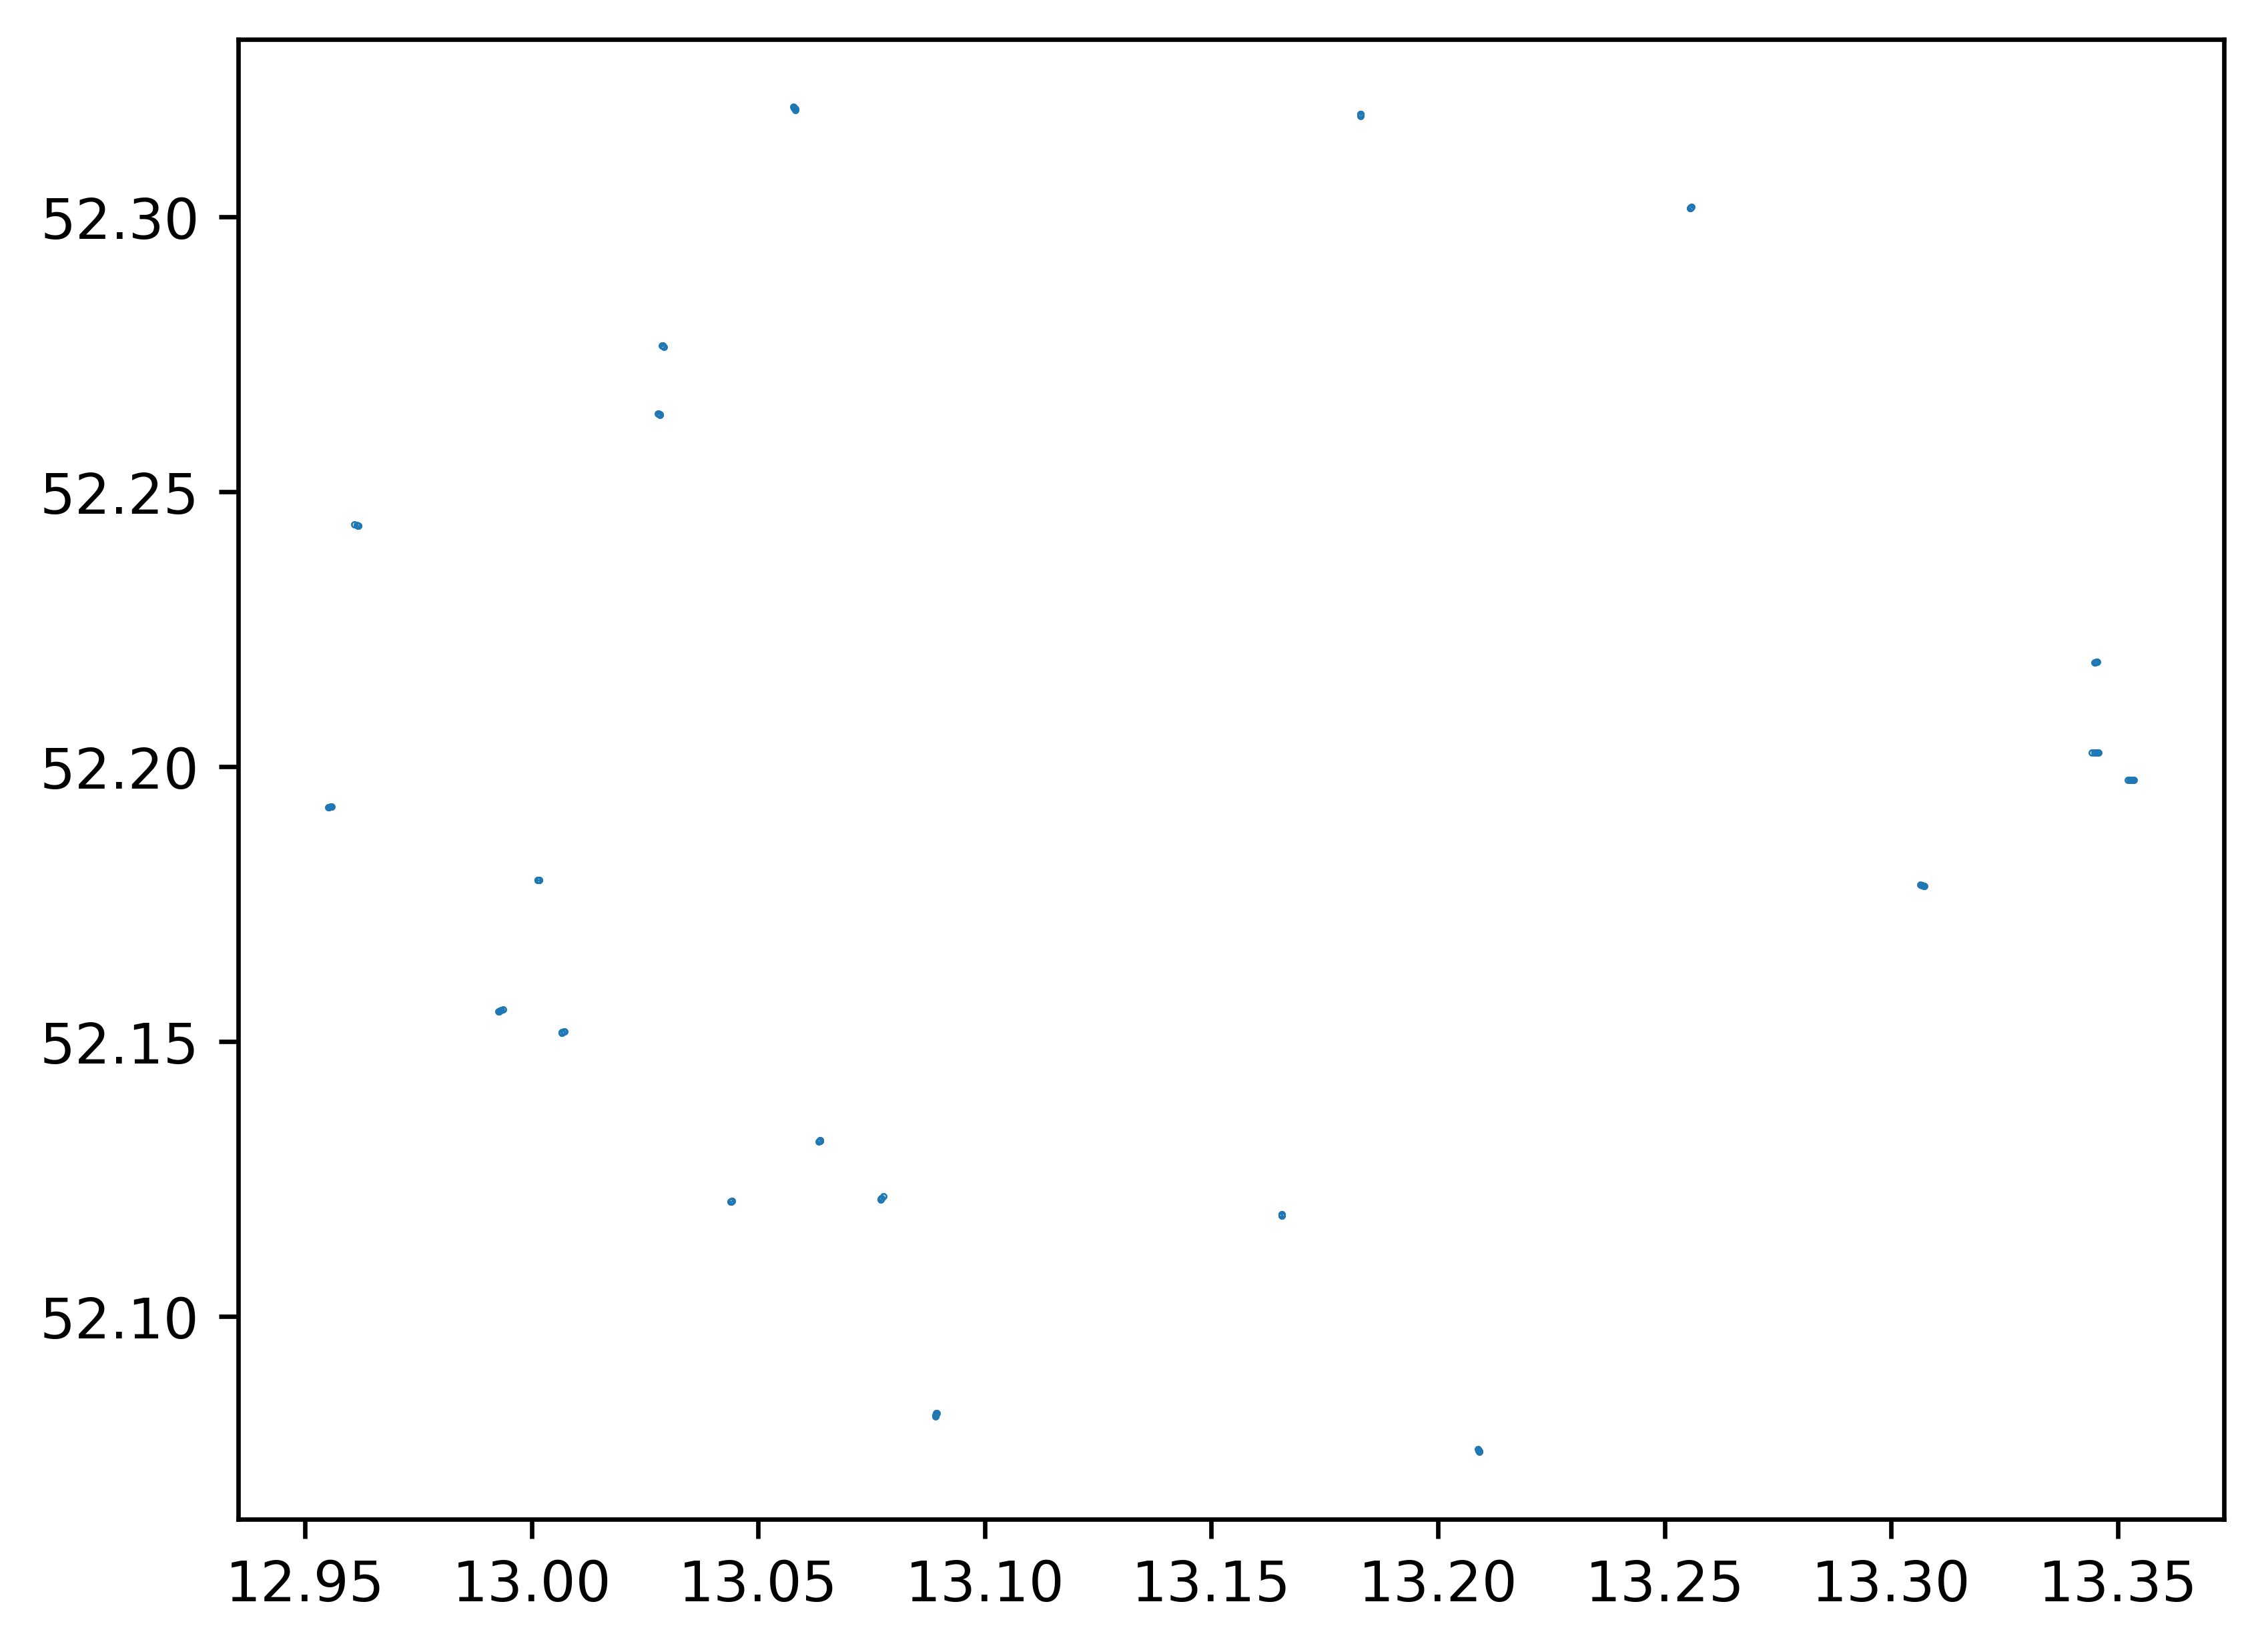

In [86]:
def flatten(xss):
    return [x for xs in xss for x in xs]

plt.scatter([p.longitude for p in flatten(points)],[p.latitude for p in flatten(points)], s=.1)

In [94]:
hmm = []

for i in range(len(starting_points)):    
    mean_lat = statistics.mean([points[x][i].latitude for x in range(len(points))])
    mean_long = statistics.mean([points[x][i].longitude for x in range(len(points))])
    
    std_lat = statistics.stdev([points[x][i].latitude for x in range(len(points))])
    std_long = statistics.stdev([points[x][i].longitude for x in range(len(points))])
    
    std_lat_meters = std_lat * 111_194.9
    std_long_meters = std_long * 111_194.9
    
    std_pythagorean_meters = hypot(std_lat_meters, std_long_meters)
    
    dist_start_mean = distance((mean_lat, mean_long), (starting_points[i].latitude, starting_points[i].longitude)).meters
    
    offset_relative = std_pythagorean_meters / dist_start_mean
    
    hmm.append([mean_lat, mean_long, std_pythagorean_meters, dist_start_mean, offset_relative])
    
avg_std_pythagorean_meters = statistics.mean([x[2] for x in hmm])
avg_dist_start_mean = statistics.mean([x[3] for x in hmm])
avg_offset_relative = statistics.mean([x[4] for x in hmm])

print(avg_std_pythagorean_meters, avg_dist_start_mean, avg_offset_relative)



31.334750087672706 12276.13647030894 0.0025384002802082807


In [ ]:

print(avg_offset_relative)

In [97]:
31.334750087672706 / 12276.13647030894

0.0025524928110288543